<a href="https://colab.research.google.com/github/PLACHI02/Data-Analytics-Projects/blob/AMAZON-SALES-DATA.ipynb/AMAZON_SALES_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: DATA EXPLORATION & CLEANING

In [10]:
#1.LOAD THE DATASET
from google.colab import files
uploaded = files.upload()


Saving Amazon Sales data.csv to Amazon Sales data (1).csv


In [11]:
#2.READ THE DATASET
import pandas as pd
#Load the Dataframe with csv file
df =pd.read_csv("Amazon Sales data.csv")

#Display first few rows
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [12]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1nwhJjs2lBCPuKv2eG7uvecgnMZjKdhhpz-w_gpkfzt4#gid=0


In [13]:
#2.CHECK BASIC INFORMATION
#Check dataset shape (rows,columns)
df.shape

#Get column names and data types
df.info()

#View summary statistics
df.describe(include = "all") #Includes Categorical & Numerical data




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,100,100,100,100,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
unique,7,76,12,2,4,100,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,NaN,11/17/2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,4,13,50,30,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.550204e+08,NaN,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,1.146066e+08,NaN,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.389225e+08,NaN,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.577086e+08,NaN,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.907551e+08,NaN,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05


In [14]:
#3.HANDLE MISSING VALUES
#Find missing values
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [15]:
#4.REMOVE DUPLICATES
#Count Duplicates
df.duplicated().sum()

#Remove Duplicates
df=df.drop_duplicates()

In [16]:
#5.CONVERT DATA TYPES
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce') # Specify the correct format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce')


In [17]:
# Convert categorical columns
categorical_cols = ['Item Type', 'Sales Channel', 'Region', 'Customer Segment', 'Order Priority']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [18]:
# Convert price and sales columns to numeric
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Cost'] = pd.to_numeric(df['Total Cost'], errors='coerce')
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    category      
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    category      
 3   Sales Channel   100 non-null    category      
 4   Order Priority  100 non-null    category      
 5   Order Date      34 non-null     datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       36 non-null     datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: category(4), datetime64[ns](2), float64(5), int64(2), ob

In [19]:
#6 STANDARDIZE COLUMN NAMES
#Converting Column Names to Lower cases & Replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

#Display Updated Columns
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],
      dtype='object')

In [20]:
#7. VALIDATING FINAL CHECKS

df.info()

df.isnull().sum()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          100 non-null    category      
 1   country         100 non-null    object        
 2   item_type       100 non-null    category      
 3   sales_channel   100 non-null    category      
 4   order_priority  100 non-null    category      
 5   order_date      34 non-null     datetime64[ns]
 6   order_id        100 non-null    int64         
 7   ship_date       36 non-null     datetime64[ns]
 8   units_sold      100 non-null    int64         
 9   unit_price      100 non-null    float64       
 10  unit_cost       100 non-null    float64       
 11  total_revenue   100 non-null    float64       
 12  total_cost      100 non-null    float64       
 13  total_profit    100 non-null    float64       
dtypes: category(4), datetime64[ns](2), float64(5), int64(2), ob

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,NaT,669165933,NaT,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,NaT,963881480,NaT,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,NaT,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50


STEP 2. DESCRIPTIVE STATISTICS

In [21]:
df.describe() #Display only numerical data

,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
count,34,1.000000e+02,36,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-08-23 06:21:10.588235264,5.550204e+08,2013-08-16 04:40:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-01-08 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-05-11 00:00:00,3.389225e+08,2012-07-03 06:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-07 00:00:00,5.577086e+08,2013-01-22 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2014-07-31 18:00:00,7.907551e+08,2014-12-17 12:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-11-03 00:00:00,9.940222e+08,2017-05-06 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [22]:
#2. SALES PERFORMANCE ANALYSIS

#Total Revenue
total_revenue = df['total_revenue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $137348768.31


In [23]:
#Top 5 Best Selling Products

df.groupby('item_type')['units_sold'].sum().sort_values(ascending=False).head(6)


<ipython-input-23-c3605b04146e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('item_type')['units_sold'].sum().sort_values(ascending=False).head(6)


,units_sold
item_type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967


In [24]:
#Most Frequently Products Sold

df['item_type'].value_counts().head(5)


,count
item_type,
Clothes,13
Cosmetics,13
Office Supplies,12
Fruits,10
Personal Care,10


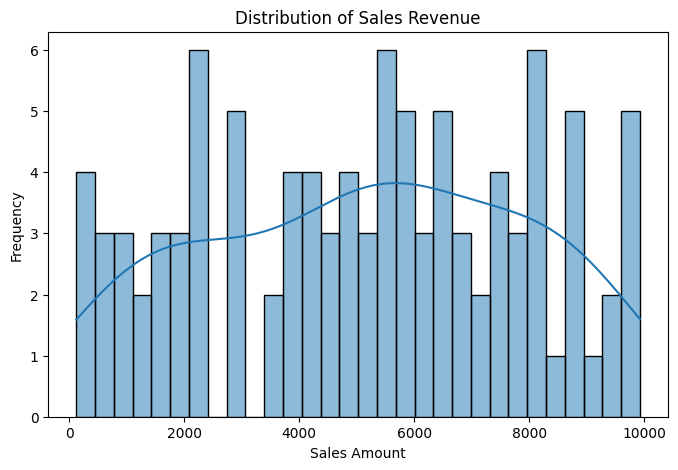

In [25]:
#3. Distribution of Order Value
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of sales
plt.figure(figsize=(8,5))
sns.histplot(df['units_sold'], bins=30, kde=True)
plt.title("Distribution of Sales Revenue")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


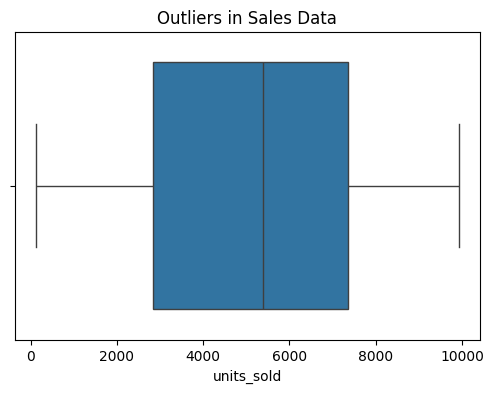

In [26]:
#4. Finding Outliers in Sales Data
plt.figure(figsize=(6,4))
sns.boxplot(x=df['units_sold'])
plt.title("Outliers in Sales Data")
plt.show()


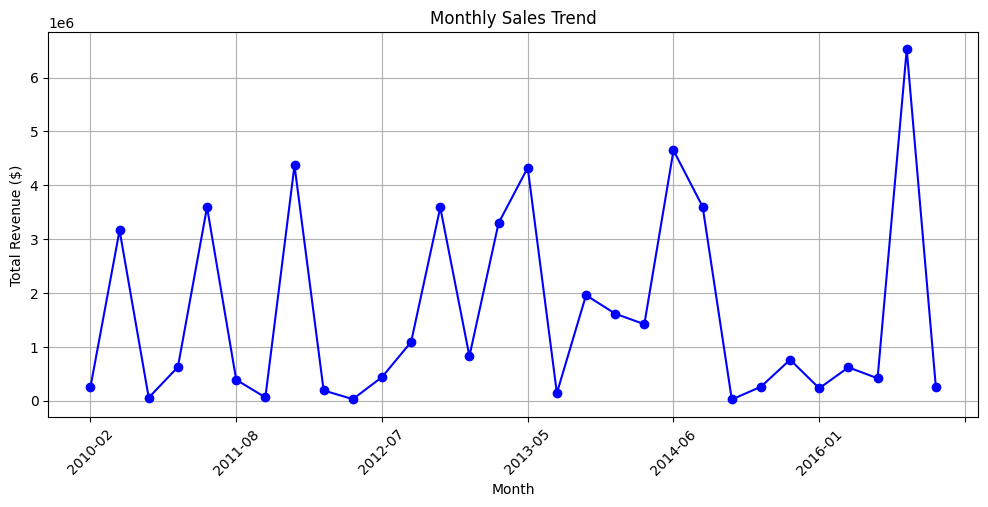

In [28]:
#Salesd Trends Over Time
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month from 'order_date' and create a new column 'Year-Month'
df['Year-Month'] = df['order_date'].dt.strftime('%Y-%m') # Create a new 'Year-Month' column

# Sales by month
monthly_sales = df.groupby('Year-Month')['total_revenue'].sum()

# Plot sales trend
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-30-bf9b63f15224>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_priority_counts.index, y=order_priority_counts.values, palette="coolwarm")


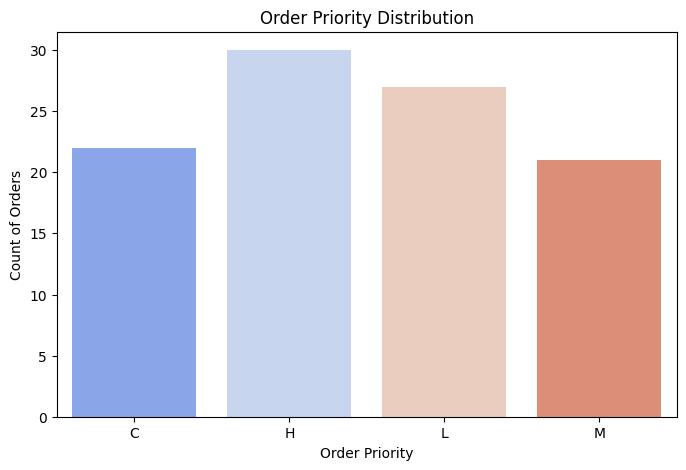

In [30]:
#Customer Behaviour Analysis
#Top Order Priorities
# Count of order priorities
order_priority_counts = df['order_priority'].value_counts()

# Plot Order Priority Distribution
plt.figure(figsize=(8,5))
sns.barplot(x=order_priority_counts.index, y=order_priority_counts.values, palette="coolwarm")
plt.title("Order Priority Distribution")
plt.xlabel("Order Priority")
plt.ylabel("Count of Orders")
plt.show()


In [31]:
#Average Order Value
avg_order_value = df['total_revenue'].mean()
print(f"Average Order Value: ${avg_order_value:,.2f}")


Average Order Value: $1,373,487.68


<ipython-input-32-b8759f256b42>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby('region')['total_revenue'].sum().sort_values(ascending=False)
<ipython-input-32-b8759f256b42>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


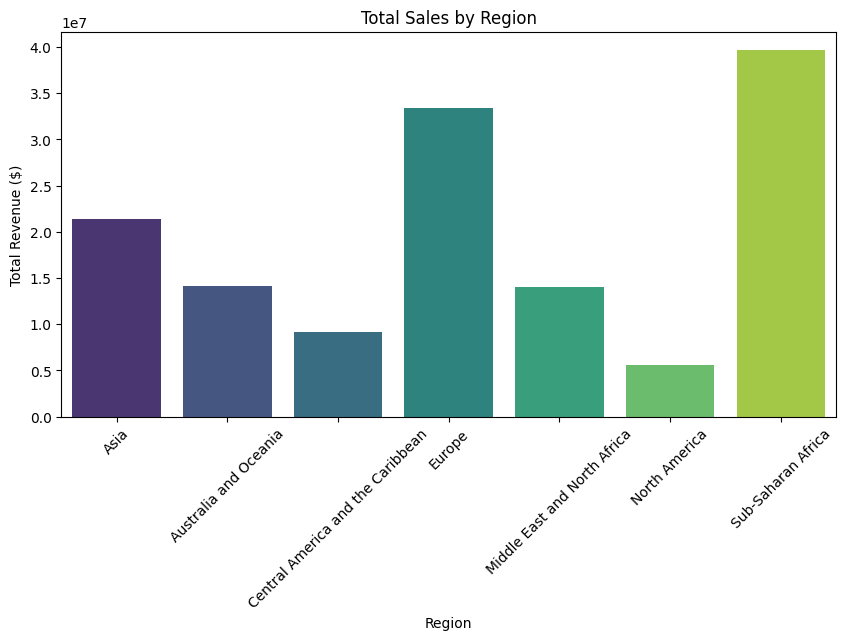

In [32]:
#Regional Sales Trends

#Sales by Region
# Sales grouped by region
region_sales = df.groupby('region')['total_revenue'].sum().sort_values(ascending=False)

# Plot Sales by Region
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


In [34]:
#Regionwise Order Value
region_avg_order = df.groupby('region')['total_revenue'].mean().sort_values(ascending=False)
print(region_avg_order)


region
Asia                                 1.940645e+06
North America                        1.881119e+06
Europe                               1.516770e+06
Middle East and North Africa         1.405271e+06
Central America and the Caribbean    1.310055e+06
Australia and Oceania                1.281297e+06
Sub-Saharan Africa                   1.102001e+06
Name: total_revenue, dtype: float64


<ipython-input-34-3a26b9397d59>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_avg_order = df.groupby('region')['total_revenue'].mean().sort_values(ascending=False)


**ORDER & SHIPMENT ANALYSIS FOR AMAZON DATA**

In [36]:
#CONVERT ORDER & SHIP DATES
# Convert 'Order Date' and 'Ship Date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Calculate shipping time (days between order and shipment)
df['Shipping Time (Days)'] = (df['ship_date'] - df['order_date']).dt.days


In [37]:
#Average Shipping Time
avg_shipping_time = df['Shipping Time (Days)'].mean()
print(f"Average Shipping Time: {avg_shipping_time:.2f} days")


Average Shipping Time: 70.77 days


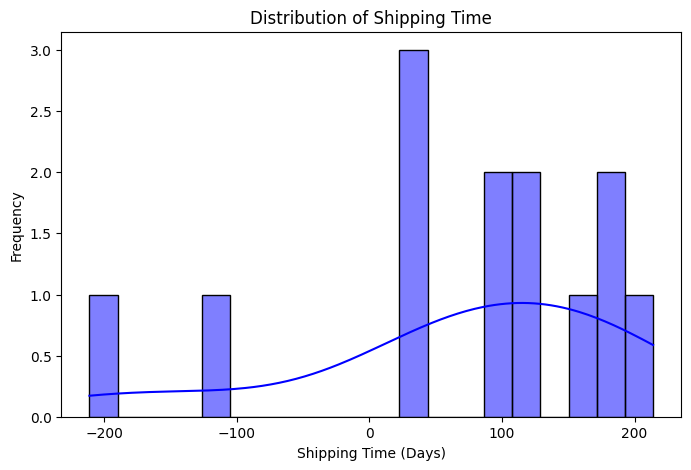

In [38]:
#Distribution of Shipping Time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Shipping Time (Days)'], bins=20, kde=True, color='b')
plt.title("Distribution of Shipping Time")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-39-6fdab0bd8524>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipment_status.index, y=shipment_status.values, palette=["green", "red"])


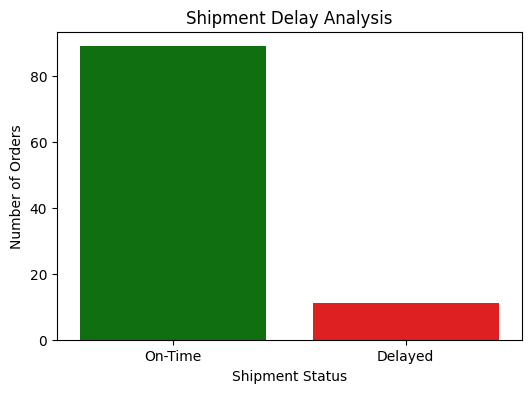

In [39]:
#Shipment Delay Analysis

# Define a threshold for delayed shipments (e.g., more than 5 days)
delay_threshold = 5
df['Delayed Shipment'] = df['Shipping Time (Days)'] > delay_threshold

# Count delayed vs. on-time shipments
shipment_status = df['Delayed Shipment'].value_counts()

# Plot Shipment Status
plt.figure(figsize=(6,4))
sns.barplot(x=shipment_status.index, y=shipment_status.values, palette=["green", "red"])
plt.xticks(ticks=[0,1], labels=["On-Time", "Delayed"])
plt.title("Shipment Delay Analysis")
plt.xlabel("Shipment Status")
plt.ylabel("Number of Orders")
plt.show()


<ipython-input-40-3d34885b349d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_shipping_time = df.groupby('region')['Shipping Time (Days)'].mean().sort_values()
<ipython-input-40-3d34885b349d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_shipping_time.index, y=region_shipping_time.values, palette="magma")


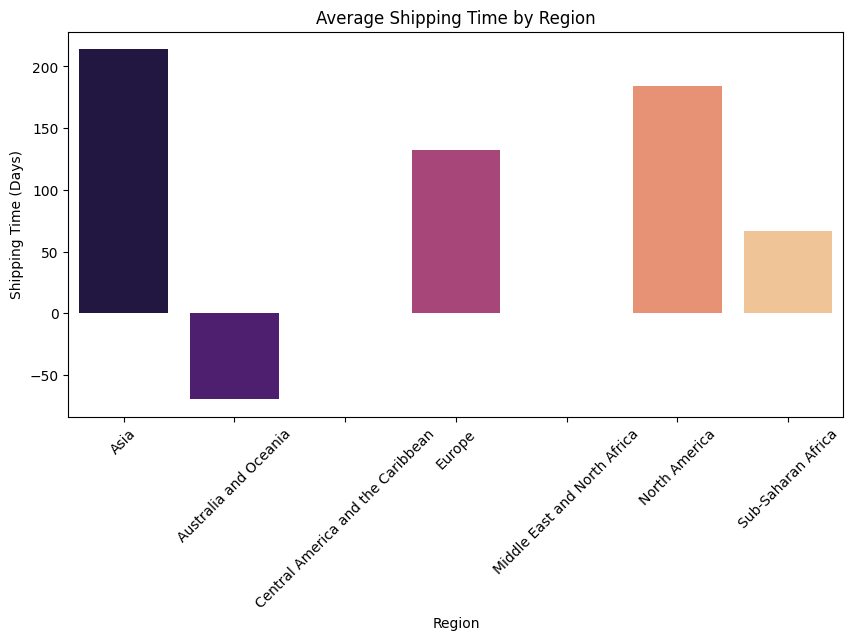

In [40]:
#Shipping Time By Region
# Average Shipping Time per Region
region_shipping_time = df.groupby('region')['Shipping Time (Days)'].mean().sort_values()

# Plot Shipping Time by Region
plt.figure(figsize=(10,5))
sns.barplot(x=region_shipping_time.index, y=region_shipping_time.values, palette="magma")
plt.title("Average Shipping Time by Region")
plt.xlabel("Region")
plt.ylabel("Shipping Time (Days)")
plt.xticks(rotation=45)
plt.show()


**Impact of Shipping Time on Customer Purchases & Order Priority**

Now, let's analyze how shipping time affects sales & customer behavior by:

✅ Checking if longer shipping times impact total revenue

✅ Comparing shipping time by order priority

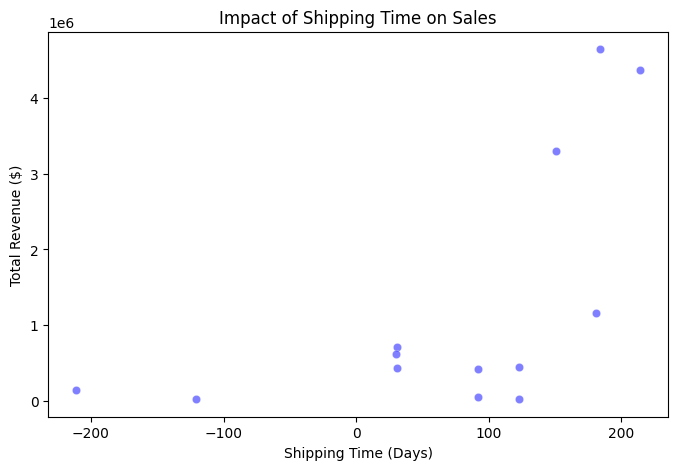

In [41]:
#Impact of Shipping Time on Sales
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Shipping Time vs. Total Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Shipping Time (Days)'], y=df['total_revenue'], alpha=0.5, color='blue')
plt.title("Impact of Shipping Time on Sales")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Total Revenue ($)")
plt.show()


In [42]:
#Correlation between Shipping Time & Revenue

# Calculate correlation
correlation = df[['Shipping Time (Days)', 'total_revenue']].corr()
print(correlation)


                      Shipping Time (Days)  total_revenue
Shipping Time (Days)              1.000000       0.594638
total_revenue                     0.594638       1.000000


<ipython-input-43-884993d27f95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['order_priority'], y=df['Shipping Time (Days)'], palette="coolwarm")


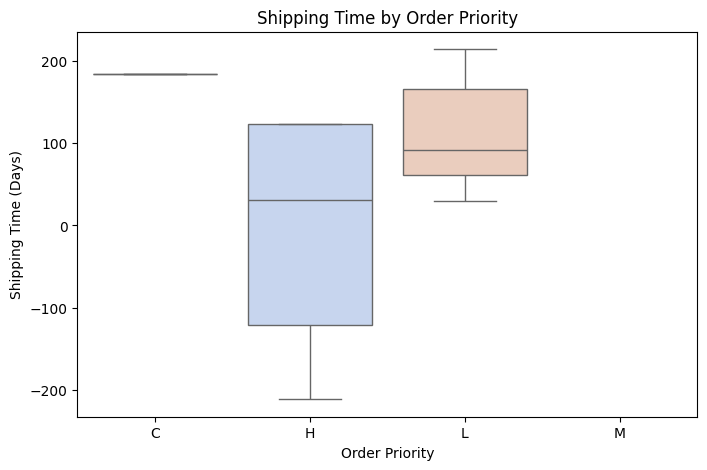

In [43]:
#Shipping Time by Order Priority
# Boxplot of Shipping Time by Order Priority
plt.figure(figsize=(8,5))
sns.boxplot(x=df['order_priority'], y=df['Shipping Time (Days)'], palette="coolwarm")
plt.title("Shipping Time by Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Shipping Time (Days)")
plt.show()


<ipython-input-44-6f3db8405898>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  priority_shipping = df.groupby('order_priority')['Shipping Time (Days)'].mean().sort_values()
<ipython-input-44-6f3db8405898>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_shipping.index, y=priority_shipping.values, palette="magma")


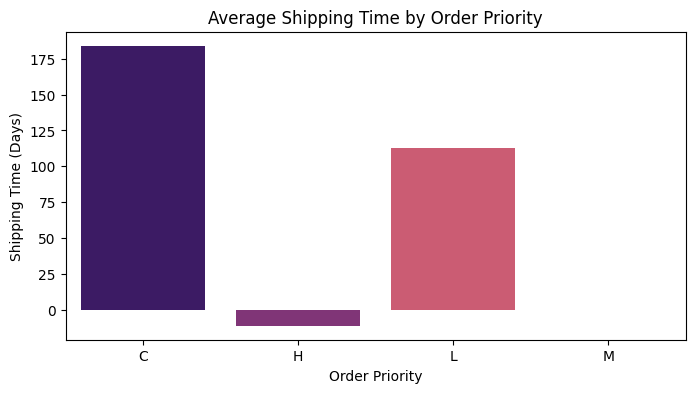

In [44]:
#Average Shipping Time by Order
# Group by Order Priority and calculate average shipping time
priority_shipping = df.groupby('order_priority')['Shipping Time (Days)'].mean().sort_values()

# Plot the results
plt.figure(figsize=(8,4))
sns.barplot(x=priority_shipping.index, y=priority_shipping.values, palette="magma")
plt.title("Average Shipping Time by Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Shipping Time (Days)")
plt.show()
